## Check which nodes were heard during the test

Visualize data from SMesh Build v1.0 nodes, data gathered on 11/06/24 in Lab64

Authors: Daniel Neamati and Lisa Fung

Last Updated: 11/06/2024

In [2]:
# Mount Google Drive to import data
# Do this first since it will prompt authentication
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
folderpath = '/content/drive/Shared drives/SMesh: Sustainability Radio Sensor Networks/smesh-software/Data Visualization/pre_pepperwood_mesh_test_2024_11_06/'
data = {}
logger = "0ff4"
# sensor_types = ["device_metrics", "bme688", "ina260", "pmsa003i"]

base_vars = ['datetime', 'from_node']
net_vars = ['rxSnr', 'hopLimit', 'rxRssi', 'hopStart']

sensor_headers = {
    "device_metrics": ['batteryLevel', 'voltage', 'channelUtilization', 'airUtilTx'],
    "bme688": ['temperature', 'relativeHumidity', 'barometricPressure', 'gasResistance', 'iaq'],
    "ina260": ['ch3Voltage', 'ch3Current'],
    "pmsa003i": ['pm10Standard', 'pm25Standard', 'pm100Standard', 'pm10Environmental', 'pm25Environmental', 'pm100Environmental']
}
sensor_types = sensor_headers.keys()

for sensor in sensor_types:
    sensor_headers[sensor] = base_vars + sensor_headers[sensor] + net_vars

for sensor in sensor_types:
    print(sensor + " started")
    data[sensor] = pd.read_csv(folderpath + logger + "_" + sensor + ".csv",
                               header=None, parse_dates=[0])
    data[sensor].columns = sensor_headers[sensor]
    data[sensor]['from_short_name'] = data[sensor]['from_node'].str[-4:]

    # print(data[sensor].dtypes)
    # print(data[sensor].head())

    print(sensor + " completed")

device_metrics started
device_metrics completed
bme688 started
bme688 completed
ina260 started
ina260 completed
pmsa003i started
pmsa003i completed


In [7]:
col_id = 'from_short_name'

for sensor in sensor_types:
    print("-----\n" + sensor + " started")
    unique_ids = data[sensor][col_id].unique()
    print("sorted:", np.sort(unique_ids), "\n")

    # Sort false will mean it sorts by dataframe column rather than frequency
    unique_stats = data[sensor][col_id].value_counts(sort=True)
    print(unique_stats)

    print(sensor + " completed\n-----\n")

-----
device_metrics started
sorted: ['0b38' '0ff4' '4004' 'ad0c' 'afcc' 'bf20' 'cb14' 'd35c' 'd7c0' 'f864'
 'fbec'] 

from_short_name
0ff4    71
0b38    12
ad0c    12
afcc    12
d35c    12
cb14    12
bf20     4
fbec     1
4004     1
f864     1
d7c0     1
Name: count, dtype: int64
device_metrics completed
-----

-----
bme688 started
sorted: ['0b38' '18e8' 'ad0c' 'afcc' 'bf20' 'c2b0' 'cb14' 'd35c' 'fbec' 'fcb4'] 

from_short_name
fbec    82
d35c    73
afcc    72
cb14    71
0b38    71
ad0c    70
18e8    48
fcb4    46
bf20    37
c2b0     2
Name: count, dtype: int64
bme688 completed
-----

-----
ina260 started
sorted: ['0b38' '18e8' 'ad0c' 'afcc' 'bf20' 'cb14' 'd35c'] 

from_short_name
18e8    72
afcc    15
ad0c    15
0b38    14
d35c    14
cb14    14
bf20    14
Name: count, dtype: int64
ina260 completed
-----

-----
pmsa003i started
sorted: ['0b38' 'ad0c' 'afcc' 'bf20' 'c2b0' 'cb14' 'd35c' 'fbec' 'fcb4'] 

from_short_name
0b38    72
d35c    72
afcc    71
cb14    71
ad0c    48
fbec    27
bf

In [8]:
# data["ina260"][data["ina260"][data["ina260"].columns[1]] == "0x433abf20"]
data["ina260"][data["ina260"]["from_short_name"] == "bf20"]

,datetime,from_node,ch3Voltage,ch3Current,rxSnr,hopLimit,rxRssi,hopStart,from_short_name
10,2024-11-06 11:43:53.825895,0x433abf20,13.28750,71.25,6.75,7,-22,7,bf20
21,2024-11-06 11:48:49.389911,0x433abf20,13.27625,81.25,6.00,7,-22,7,bf20
32,2024-11-06 11:53:50.304908,0x433abf20,13.27250,73.75,7.75,7,-20,7,bf20
41,2024-11-06 11:57:19.484253,0x433abf20,13.27500,63.75,6.00,7,-24,7,bf20
53,2024-11-06 12:02:18.266827,0x433abf20,13.26500,82.50,6.25,7,-23,7,bf20
64,2024-11-06 12:07:18.115543,0x433abf20,13.27000,68.75,5.75,7,-22,7,bf20
75,2024-11-06 12:12:18.671354,0x433abf20,13.26625,63.75,6.50,7,-28,7,bf20
86,2024-11-06 12:17:19.468385,0x433abf20,13.26000,73.75,5.75,7,-34,7,bf20
97,2024-11-06 12:22:20.710517,0x433abf20,13.26000,75.00,6.00,7,-26,7,bf20
108,2024-11-06 12:27:22.303210,0x433abf20,13.25750,80.00,6.75,7,-32,7,bf20


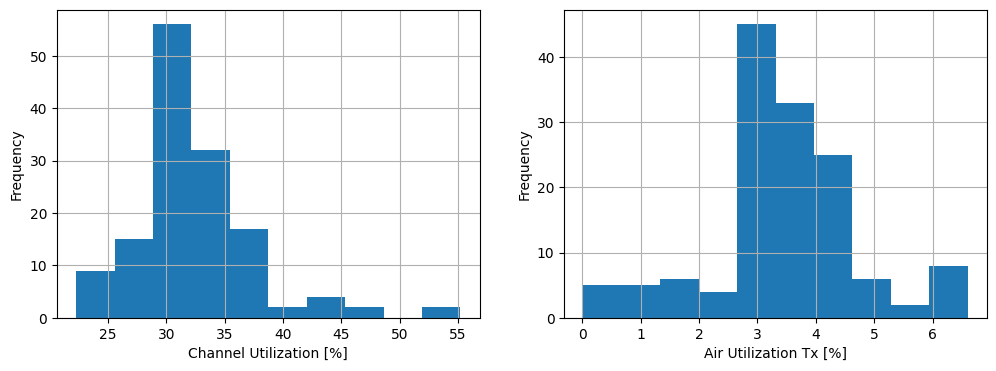

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(12, 4))

# 'channelUtilization', 'airUtilTx'
data["device_metrics"]['channelUtilization'].hist(ax=axes[0])
axes[0].set(xlabel="Channel Utilization [%]", ylabel="Frequency")

data["device_metrics"]['airUtilTx'].hist(ax=axes[1])
axes[1].set(xlabel="Air Utilization Tx [%]", ylabel="Frequency");

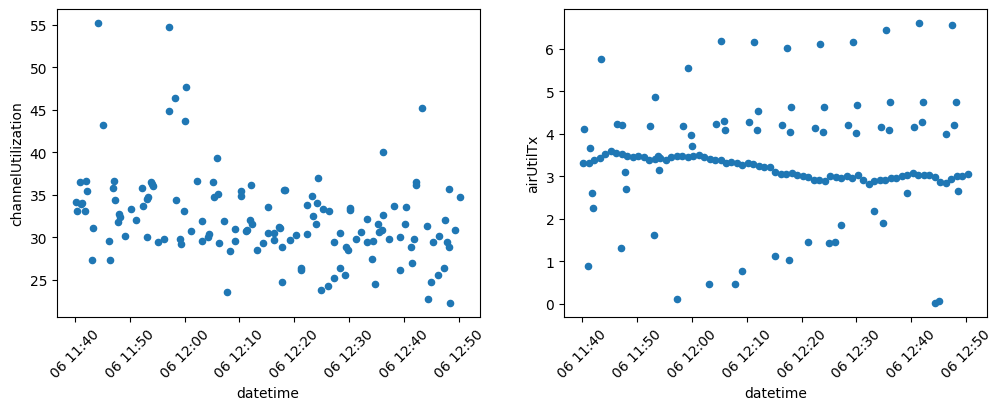

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(12, 4))

data["device_metrics"].plot.scatter(x='datetime', y='channelUtilization', ax=axes[0], rot=45)
data["device_metrics"].plot.scatter(x='datetime', y='airUtilTx', ax=axes[1], rot=45);

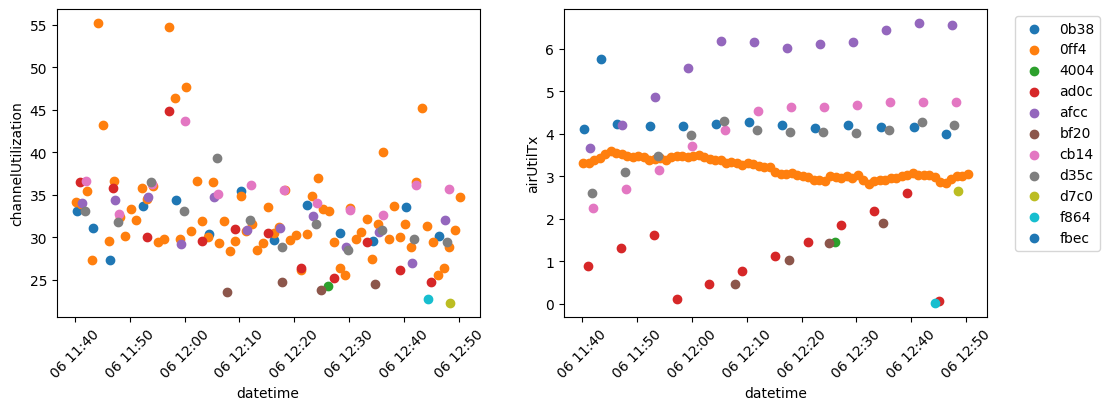

In [24]:
col_id = 'from_short_name'

df_from_node_sorted = data["device_metrics"].sort_values(by=col_id)
unique_ids = df_from_node_sorted[col_id].unique()

fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(12, 4))

for n, grp in df_from_node_sorted.groupby(col_id):
    axes[0].scatter(x = 'datetime', y = 'channelUtilization', data=grp, label=n)
    axes[1].scatter(x = 'datetime', y = 'airUtilTx', data=grp, label=n)

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel('datetime')

axes[0].set_ylabel('channelUtilization')
axes[1].set_ylabel('airUtilTx')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
data["device_metrics"].dtypes

,0
datetime,datetime64[ns]
from_node,object
batteryLevel,int64
voltage,float64
channelUtilization,float64
airUtilTx,float64
rxSnr,float64
hopLimit,int64
rxRssi,float64
hopStart,float64


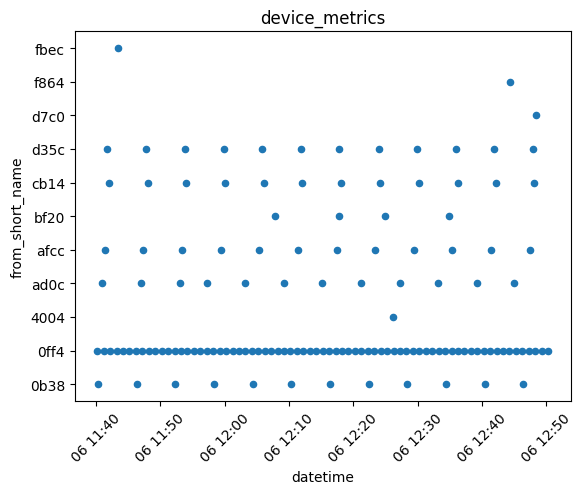

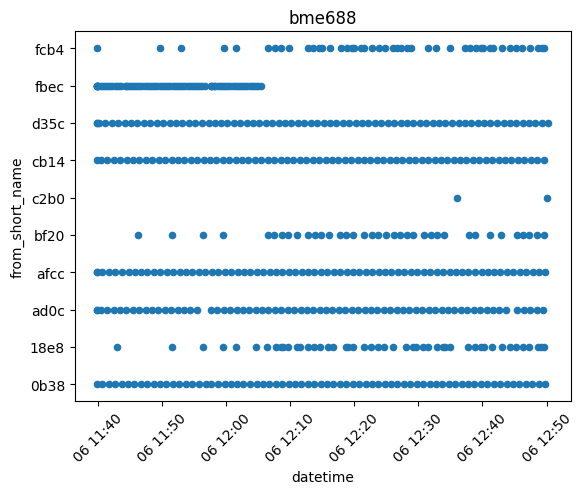

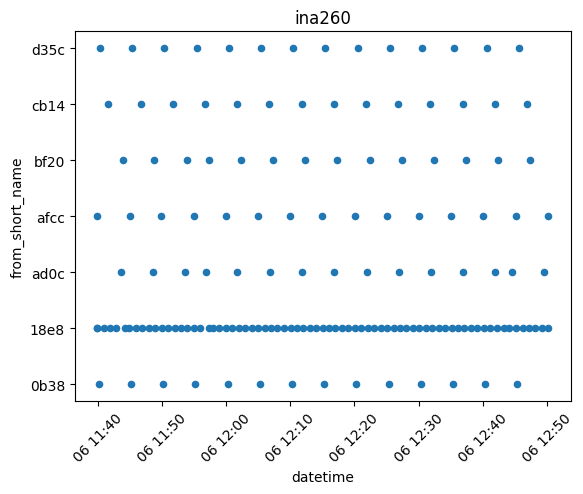

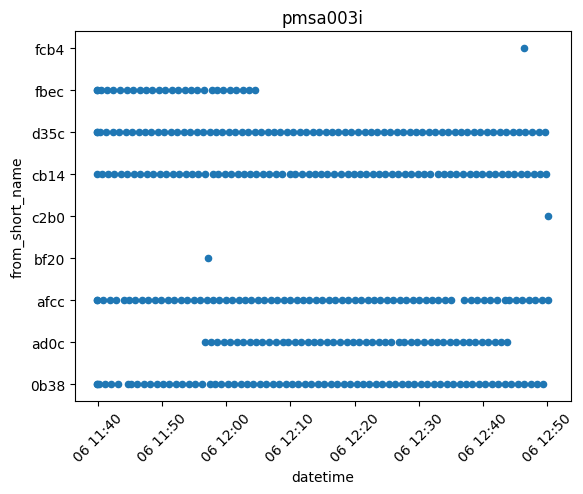

In [11]:
for sensor in sensor_types:
    df_from_node_sorted = data[sensor].sort_values(by='from_short_name')
    ax_heard = df_from_node_sorted.plot.scatter(x='datetime', y='from_short_name', rot=45)
    ax_heard.set_title(sensor)
    plt.show()